In [83]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from datetime import datetime
import datetime

import ipywidgets

%matplotlib widget
import numpy as np

In [19]:
price_df= pd.read_csv("aluminium_price.csv")

price_df = price_df[['Month','Price']]
price_df = price_df.set_index('Month')
price_df.index = pd.to_datetime(price_df.index)
#df.Price = df.Price.str.replace(',', '')
price_df.Price = price_df.Price.astype(float)


In [20]:

production_df = pd.read_csv("aluminuim_production.csv")
production_df=  production_df.set_index('date')
production_df.index = pd.to_datetime(production_df.index,format='%d/%m/%Y')
production_df['sum'] = production_df[list(production_df.columns)].sum(axis=1)
production_df = production_df.loc['1997-10-01':'2022-09-01']
production_df =  production_df['sum']



In [21]:
energy_df = pd.read_csv("Global price of Energy index.csv")

energy_df =  energy_df.set_index('DATE')
energy_df.index = pd.to_datetime(energy_df.index,format='%Y/%m/%d')
energy_df = energy_df.loc['1997-10-01':'2022-09-01']
energy_df= energy_df.rename(columns={'PNRGINDEXM': 'energy_price'})


In [22]:
gdp_df = pd.read_csv("world gdp monthly.csv")
#gdp_df = gdp_df.set_index('Date')
gdp_df.Date = pd.to_datetime(gdp_df.Date,format='%Y-%m-%d')
for i in range(0,gdp_df.shape[0]):
    gdp_df.at[i,'Date'] = gdp_df['Date'].iloc[i].replace(day=1)

gdp_df.sort_values('Date', ascending=True)
gdp_df = gdp_df.set_index('Date')
gdp_df = gdp_df.rename(columns={'Value': 'world_gdp'})

gdp_df = gdp_df.loc['1997-10-01':]



In [23]:
us_dollar_index_df = pd.read_csv("US Dollar Index Historical Data.csv")
us_dollar_index_df = us_dollar_index_df[['Date','Price']]
us_dollar_index_df = us_dollar_index_df.rename(columns={'Price':'us_dollar_index'})
us_dollar_index_df=  us_dollar_index_df.set_index('Date')
us_dollar_index_df.index = pd.to_datetime(us_dollar_index_df.index,format='%m/%d/%Y')
us_dollar_index_df = us_dollar_index_df.loc['1997-10-01':]
us_dollar_index_df

,us_dollar_index
Date,
2022-11-01,106.63
2022-10-01,111.54
2022-09-01,112.12
2022-08-01,108.85
2022-07-01,106.00
...,...
1998-02-01,99.82
1998-01-01,100.79
1997-12-01,99.65


In [24]:
usd_canadian_df = pd.read_csv("usd_canadian_dollar.csv")
usd_canadian_df = usd_canadian_df[['Date','Close']]
usd_canadian_df = usd_canadian_df.rename(columns={'Close':'usd_canadian_exchange_rate'})
usd_canadian_df['Date'] = pd.to_datetime(usd_canadian_df.Date, format='%Y-%m-%d')
usd_canadian_df['YearMonth'] = pd.to_datetime(usd_canadian_df['Date']).apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))
usd_canadian_df = usd_canadian_df.groupby('YearMonth')['usd_canadian_exchange_rate'].sum()
usd_canadian_df.index = pd.to_datetime(usd_canadian_df.index,format='%Y/%m')
usd_canadian_df

YearMonth
2003-10-01    30.41190
2003-11-01    26.25250
2003-12-01    30.17210
2003-09-01    13.53920
2004-01-01    28.52690
                ...   
2022-05-01    28.27628
2022-06-01    28.16774
2022-07-01    27.16295
2022-08-01    29.69545
2022-09-01    29.26261
Name: usd_canadian_exchange_rate, Length: 231, dtype: float64

In [25]:
usd_india_df = pd.read_csv("usd_india_rupee.csv")
usd_india_df = usd_india_df[['Date','Close']]
usd_india_df = usd_india_df.rename(columns={'Close':'usd_india_exchange_rate'})
usd_india_df['Date'] = pd.to_datetime(usd_india_df.Date, format='%Y-%m-%d')
usd_india_df['YearMonth'] = pd.to_datetime(usd_india_df['Date']).apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))
usd_india_df = usd_india_df.groupby('YearMonth')['usd_india_exchange_rate'].sum()
usd_india_df.index = pd.to_datetime(usd_india_df.index,format='%Y/%m')
usd_india_df

YearMonth
2021-11-01     373.614296
2021-12-01    1734.050499
2022-01-01    1563.351577
2022-10-01    1727.594598
2022-11-01    1470.182288
2022-02-01    1498.348511
2022-03-01    1752.021103
2022-04-01    1599.490577
2022-05-01    1699.584098
2022-06-01    1716.504686
2022-07-01    1670.703913
2022-08-01    1828.729005
2022-09-01    1763.717697
Name: usd_india_exchange_rate, dtype: float64

In [26]:
usd_russian_df = pd.read_csv("usd_russian_ruble.csv")
usd_russian_df = usd_russian_df[['Date','Close']]
usd_russian_df = usd_russian_df.rename(columns={'Close':'usd_russian_exchange_rate'})
usd_russian_df['Date'] = pd.to_datetime(usd_russian_df.Date, format='%Y-%m-%d')
usd_russian_df['YearMonth'] = pd.to_datetime(usd_russian_df['Date']).apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))
usd_russian_df = usd_russian_df.groupby('YearMonth')['usd_russian_exchange_rate'].sum()
usd_russian_df.index = pd.to_datetime(usd_russian_df.index,format='%Y/%m')
usd_russian_df

YearMonth
2003-12-01     676.260005
2004-01-01     605.130002
2004-10-01     435.281006
2004-11-01     628.319999
2004-12-01     641.662498
                 ...     
2022-05-01    1439.304755
2022-06-01    1323.214006
2022-07-01    1289.686796
2022-08-01    1398.605101
2022-09-01    1321.370002
Name: usd_russian_exchange_rate, Length: 228, dtype: float64

In [27]:
usd_eur_df = pd.read_csv("usd-eur_exchange_rates.csv")
usd_eur_df = usd_eur_df[['Date','Close']]
usd_eur_df = usd_eur_df.rename(columns={'Close':'usd_eur_exchange_rate'})
usd_eur_df['Date'] = pd.to_datetime(usd_eur_df.Date, format='%Y-%m-%d')
usd_eur_df['YearMonth'] = pd.to_datetime(usd_eur_df['Date']).apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))
usd_eur_df = usd_eur_df.groupby('YearMonth')['usd_eur_exchange_rate'].sum()
usd_eur_df.index = pd.to_datetime(usd_eur_df.index,format='%Y/%m')
usd_eur_df

YearMonth
2003-12-01    18.68141
2004-01-01    17.45101
2004-10-01    16.00921
2004-11-01    16.92204
2004-12-01    17.14439
                ...   
2022-05-01    20.80944
2022-06-01    20.80244
2022-07-01    20.60116
2022-08-01    22.71245
2022-09-01    22.20072
Name: usd_eur_exchange_rate, Length: 228, dtype: float64

In [28]:
df =  pd.concat([price_df,production_df,energy_df,gdp_df,us_dollar_index_df,usd_canadian_df,usd_india_df,usd_eur_df,usd_russian_df], axis=1)
df = df.rename(columns={'Price': 'aluminum_price', 'sum': 'world_production'})
df


,aluminum_price,world_production,energy_price,world_gdp,us_dollar_index,usd_canadian_exchange_rate,usd_india_exchange_rate,usd_eur_exchange_rate,usd_russian_exchange_rate
1997-10-01,1607.86,1873.0,53.429404,51.946298,95.64,NaN,NaN,NaN,NaN
1997-11-01,1598.99,1829.0,51.295632,52.074594,97.79,NaN,NaN,NaN,NaN
1997-12-01,1530.51,1886.0,46.373656,52.157845,99.65,NaN,NaN,NaN,NaN
1998-01-01,1485.79,1921.0,42.128222,52.116865,100.79,NaN,NaN,NaN,NaN
1998-02-01,1465.56,1760.0,40.329750,52.169421,99.82,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-07-01,2408.42,5889.0,343.809997,NaN,106.00,27.16295,1670.703913,20.60116,1289.686796
2022-08-01,2430.79,5901.0,376.412083,NaN,108.85,29.69545,1828.729005,22.71245,1398.605101
2022-09-01,2228.09,5669.0,330.149586,NaN,112.12,29.26261,1763.717697,22.20072,1321.370002
2022-10-01,NaN,NaN,NaN,NaN,111.54,28.76609,1727.594598,21.34455,1295.594816


In [109]:
df = pd.read_csv("combination1.csv", index_col = 'Unnamed: 0')
df

,aluminum_price,world_production,energy_price,world_gdp,us_dollar_index,usd_canadian_exchange_rate,usd_india_exchange_rate,usd_eur_exchange_rate,usd_russian_exchange_rate
1997-10-01,1607.86,1873.0,53.429404,51.946298,95.64,NaN,NaN,NaN,NaN
1997-11-01,1598.99,1829.0,51.295632,52.074594,97.79,NaN,NaN,NaN,NaN
1997-12-01,1530.51,1886.0,46.373656,52.157845,99.65,NaN,NaN,NaN,NaN
1998-01-01,1485.79,1921.0,42.128222,52.116865,100.79,NaN,NaN,NaN,NaN
1998-02-01,1465.56,1760.0,40.329750,52.169421,99.82,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-07-01,2408.42,5889.0,343.809997,NaN,106.00,27.16295,1670.703913,20.60116,1289.686796
2022-08-01,2430.79,5901.0,376.412083,NaN,108.85,29.69545,1828.729005,22.71245,1398.605101
2022-09-01,2228.09,5669.0,330.149586,NaN,112.12,29.26261,1763.717697,22.20072,1321.370002
2022-10-01,NaN,NaN,NaN,NaN,111.54,28.76609,1727.594598,21.34455,1295.594816


In [74]:
df.columns

Index(['aluminum_price', 'world_production', 'energy_price', 'world_gdp',
       'us_dollar_index', 'usd_canadian_exchange_rate',
       'usd_india_exchange_rate', 'usd_eur_exchange_rate',
       'usd_russian_exchange_rate'],
      dtype='object')

In [75]:
cols = ['aluminum_price', 'world_production', 'energy_price', 'world_gdp',
       'us_dollar_index', 'usd_canadian_exchange_rate',
       'usd_india_exchange_rate', 'usd_eur_exchange_rate',
       'usd_russian_exchange_rate']


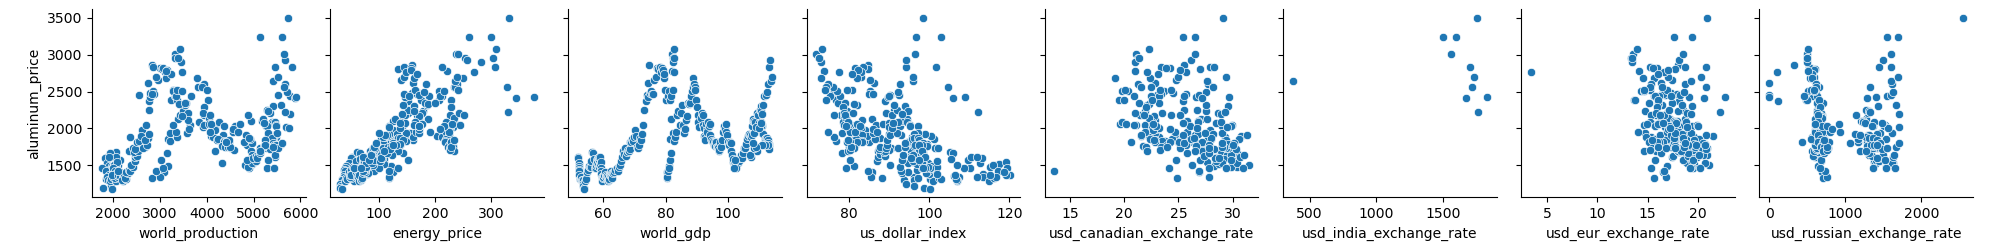

In [76]:
sns.pairplot(data=df,
                  y_vars=['aluminum_price'],
                  x_vars=['world_production', 'energy_price', 'world_gdp',
       'us_dollar_index', 'usd_canadian_exchange_rate',
       'usd_india_exchange_rate', 'usd_eur_exchange_rate',
       'usd_russian_exchange_rate'])

In [77]:
df_corr = df[cols].corr()
df_corr[['aluminum_price']].style.background_gradient(cmap='Blues')

,aluminum_price
aluminum_price,1.000000
world_production,0.381671
energy_price,0.763009
world_gdp,0.390897
us_dollar_index,-0.530520
usd_canadian_exchange_rate,-0.349267
usd_india_exchange_rate,0.005408
usd_eur_exchange_rate,-0.292297
usd_russian_exchange_rate,-0.164241


4196.240713457444